In [18]:
# Import libs
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df = pd.read_csv('transaction_data.csv', parse_dates=['date'])

### Data description

- `date` – date (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- `name` – the user's name
- `transaction` – transaction status

In [12]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [13]:
df.shape

(5315, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


### Task 1.
How many missing values are there in the dataset?

In [15]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

### Task 2.
Check what values the transaction column takes. How many observations relate to one level or another? Visualize the result using a barplot.

Question: Arrange the levels of the variable in descending order of the number of related observations (from greater to lesser)

In [25]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [33]:
transaction_values = df.transaction.value_counts().to_frame().reset_index()

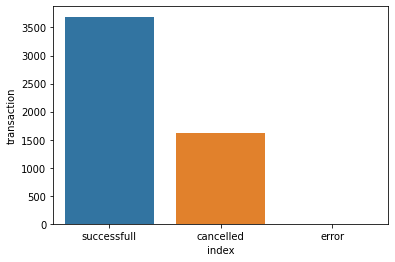

In [34]:
sns.barplot(x='index', y='transaction', data=transaction_values)

### Task 3.
How many errors have occurred?

In [35]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

### Task 4.
How many transactions did each of the users make? Transactions with the successful value are considered completed

Look at the characteristics of the distribution, and then build a histogram of the number of successful transactions made by each user, where

on the x–axis – the number of transactions
on the y-axis - the proportion of users with this number of transactions

In [47]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [48]:
successfull_trans = df.query('transaction == "successfull"') \
    .name.value_counts().to_frame()

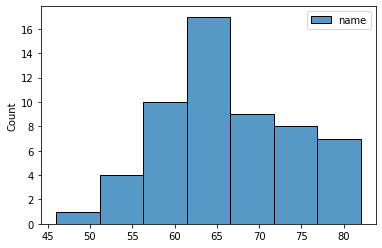

In [50]:
sns.histplot(data=successfull_trans)

In [53]:
successfull_trans.describe()

,name
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


### Task 5.
A colleague has come to you with slightly updated data. Build a pivot table of user_vs_minute_pivot, where:

columns – user names
rows – minute of operation time (minute)
values – number of operations performed
Fill in the missing values with zeros.

Note: there is no need to filter successful transactions - build a table for all

In [56]:
task5_df = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv')

In [57]:
user_vs_minute_pivot = task5_df \
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)

In [59]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


### Task 6.
A colleague has built the following graph from the summary table from the previous step, and doubts that there is no error in the data.

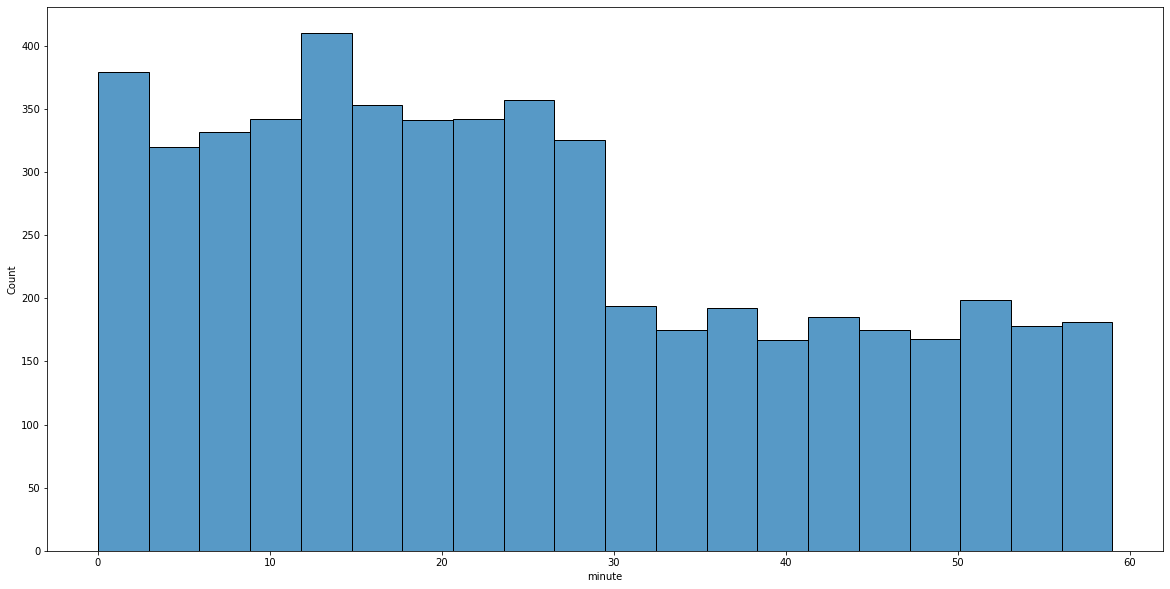

In [63]:
plt.figure(figsize=(20,10))
sns.histplot(data=task5_df, x='minute')

### Task 7.
Correct a colleague's mistake (if there is one), and count the number of minutes that have passed since the beginning of the day. Save the result to the true_minute column. Plot the graph as in the previous step and see if there have been any changes (you don't need to include the graph in the code).

In [67]:
task5_df['true_minute'] = df.date.dt.hour * 60 + df.date.dt.minute

In [68]:
task5_df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


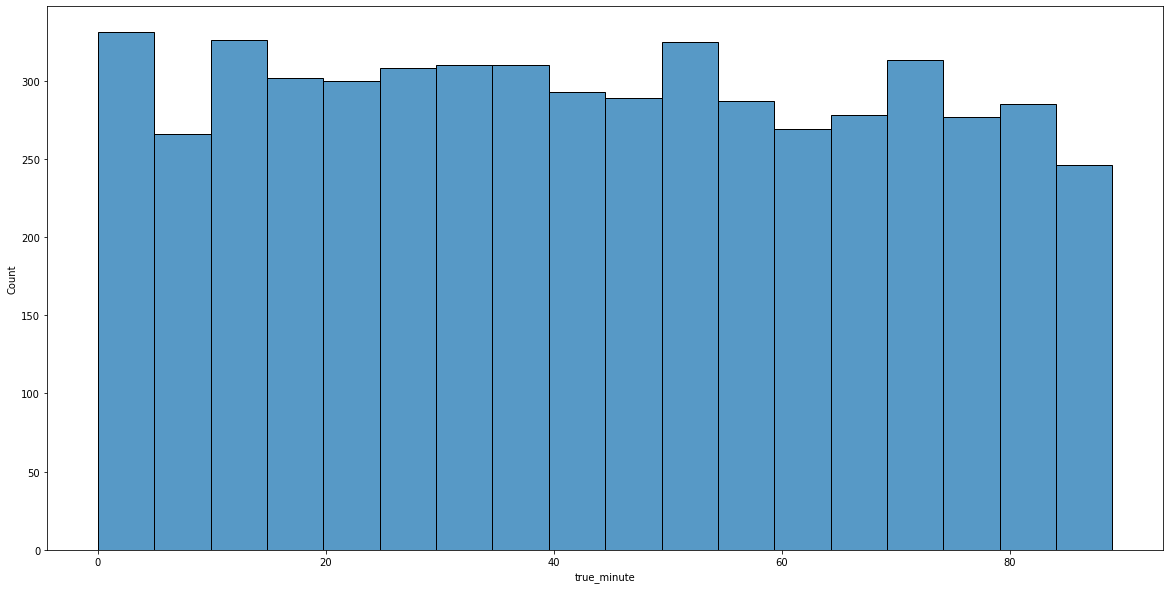

In [69]:
plt.figure(figsize=(20,10))
sns.histplot(data=task5_df, x='true_minute')